In [1]:
#Import basic Libraries
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [2]:
#loading dataset
dataset = load_iris()

In [4]:
#Summarize Dataset
print(dataset.data)
print(dataset.target)
print(dataset.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
#Segragating dataset
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
Y = dataset.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
#Splitting Dataset into Train & Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


Text(0, 0.5, 'score')

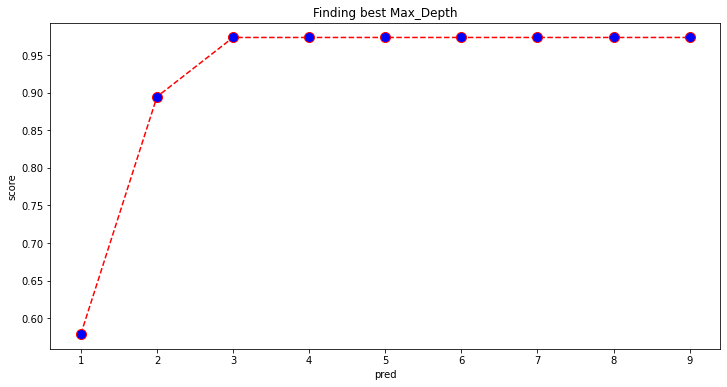

In [8]:
#Finding best max_depth Value
accuracy = []
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

for i in range(1, 10):
    model = DecisionTreeClassifier(max_depth = i, random_state = 0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test, pred)
    accuracy.append(score)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Finding best Max_Depth')
plt.xlabel('pred')
plt.ylabel('score')

In [9]:
#Training with entropy
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3, random_state = 0)
model1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [10]:
#Training with gini
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, random_state = 0)
model2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [11]:
y1_pred = model1.predict(X_test)
y1_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [12]:
y2_pred = model2.predict(X_test)
y2_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [13]:
#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy of the Model(criteria-gini): {0}%".format(accuracy_score(y_test, y2_pred)*100))
print("Accuracy of the Model(criteria-entropy): {0}%".format(accuracy_score(y_test, y1_pred)*100))

Accuracy of the Model(criteria-gini): 97.36842105263158%
Accuracy of the Model(criteria-entropy): 97.36842105263158%


# **1.Decision Tree for Classification**


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
dataset = pd.read_csv("/content/drive/MyDrive/dataset/bill_authentication.csv")


In [48]:
dataset.head()


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [49]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [50]:
dataset.describe()


,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [51]:
dataset.shape


(1372, 5)

In [52]:
# Preparing the data 

X = dataset.drop('Class', axis=1)
y = dataset['Class']


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [54]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
y_pred = classifier.predict(X_test)


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

print()
print()
print(classification_report(y_test, y_pred))

[[145   2]
 [  3 125]]


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       147
           1       0.98      0.98      0.98       128

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



# **2.Decision Tree for Regression**


In [57]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/petrol_consumption_new.csv')


In [58]:
dataset.head()


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [59]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [60]:
# Preparing the Data

X = dataset.drop('Petrol_Consumption', axis=1)
y = dataset['Petrol_Consumption']


In [61]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [63]:
y_pred = regressor.predict(X_test)


In [64]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

df

,Actual,Predicted
29,534,547.0
4,410,414.0
26,577,554.0
30,571,554.0
32,577,554.0
37,704,574.0
34,487,628.0
40,587,525.0
7,467,414.0
10,580,498.0


In [65]:

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 54.8
Mean Squared Error: 5169.0
Root Mean Squared Error: 71.89575787207477


In [91]:
## importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [92]:
df = pd.read_csv('/content/drive/MyDrive/dataset/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [93]:
df.shape


(45211, 17)

In [94]:
df.nunique()


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [95]:
df[['Target','housing','default','loan']] = df[['Target','housing','default','loan']].replace(('yes','no'),(1,0))
df['education'] = df['education'].replace(('tertiary', 'secondary', 'primary', 'unknown'),(3,2,1,0))
df['month'] = df['month'].replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12))
#Dealing with binary variables and some categorical variables. I decided to make education a categorical variable from 0-3 to see if there is any correlation between increased 
#education and the target variable. I did the same with months as there is a depency between them, i.e. theres a beginning and end of the year.
#I did not one hot encode all the data because that would mess up my graphs. It will be done afterwards

In [96]:
vc = df[['Target','housing','default','loan']].sum().reset_index().rename(columns={'index':'Col_Name',0:"Value_Count_1"})
vc['Value_Count_0'] = df.shape[0] - vc['Value_Count_1']
vc

,Col_Name,Value_Count_1,Value_Count_0
0,Target,5289,39922
1,housing,25130,20081
2,default,815,44396
3,loan,7244,37967


In [97]:
dfnew = df.drop(['marital','job','contact','poutcome'],axis=1)
dfnew = dfnew.join(pd.get_dummies(df[['marital','job','contact','poutcome']],prefix=['marital','job','contract','poutcome'],))

In [98]:
df=dfnew


In [99]:
x = df.loc[:, df.columns != 'Target']
y = df.loc[:, df.columns == 'Target']
x.head()


,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contract_cellular,contract_telephone,contract_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,5,261,1,-1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,33,2,0,2,1,1,5,5,76,1,-1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,47,0,0,1506,1,0,5,5,92,1,-1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,33,0,0,1,0,0,5,5,198,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [100]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [101]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC



model_entropy = DecisionTreeClassifier(criterion='entropy')

In [103]:
model_entropy.fit(xtrain, ytrain)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [104]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [105]:
print("Train: %.2f" % model_entropy.score(xtrain, ytrain))  # performance on train data
print("Test: %.2f" % model_entropy.score(xtest, ytest))  # performance on test data

Train: 1.00
Test: 0.88


In [106]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(xtrain, ytrain)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [107]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [108]:
print("Train: %.2f" % clf_pruned.score(xtrain, ytrain))  # performance on train data
print("Test: %.2f" % clf_pruned.score(xtest, ytest))  # performance on test data

Train: 0.90
Test: 0.90


In [110]:
## Calculating feature importance
features = [col for col in df.columns if col != 'Target']
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.572667
poutcome_success,0.294571
contract_unknown,0.109386
month,0.017903
housing,0.003819
marital_married,0.001654
age,0.000000
job_unemployed,0.000000
job_self-employed,0.000000
job_services,0.000000


In [111]:
#it seems to be using only a couple features
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(xtrain, ytrain)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [112]:

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [113]:
pred_RF = rfcl.predict(xtest)
acc_RF = accuracy_score(ytest, pred_RF)

In [116]:
acc_RF

0.9054113830728399

In [117]:
%matplotlib inline
from sklearn import datasets
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import random as rnd

iris = datasets.load_iris()

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [118]:
X = iris.data[0:150, :]
Y = iris.target[0:150]
X.shape


(150, 4)

In [119]:
setosa_index = rnd.randrange(0, 49)
test_setosa = [iris.data[setosa_index, :]]
X = np.delete(X, setosa_index, 0)
Y = np.delete(Y, setosa_index, 0)
test_setosa, iris.target_names[iris.target[setosa_index]], X.shape, Y.shape

([array([5.1, 3.8, 1.9, 0.4])], 'setosa', (149, 4), (149,))

In [120]:
virginica_index = rnd.randrange(100, 150)
test_virginica = [iris.data[virginica_index, :]]
X = np.delete(X, virginica_index, 0)
Y = np.delete(Y, virginica_index, 0)
test_virginica, iris.target_names[iris.target[virginica_index]], X.shape, Y.shape

([array([7.7, 3.8, 6.7, 2.2])], 'virginica', (148, 4), (148,))

In [121]:
versicolor_index = rnd.randrange(50, 99)
test_versicolor = [iris.data[versicolor_index, :]]
X = np.delete(X, versicolor_index, 0)
Y = np.delete(Y, versicolor_index, 0)
test_versicolor, iris.target_names[iris.target[versicolor_index]], X.shape, Y.shape

([array([5.7, 2.8, 4.5, 1.3])], 'versicolor', (147, 4), (147,))

In [122]:
# Decision Tree Classifier Model
model_tree = tree.DecisionTreeClassifier()

# Training the model
model_tree.fit(X, Y)

pred_tree_setosa = model_tree.predict(test_setosa)
print('Decision Tree predicts {} for test_setosa'
      .format(iris.target_names[pred_tree_setosa]))


Decision Tree predicts ['setosa'] for test_setosa


In [123]:
pred_tree_virginica = model_tree.predict(test_virginica)
print('Decision Tree predicts {} for test_virginica'
      .format(iris.target_names[pred_tree_virginica]))

Decision Tree predicts ['virginica'] for test_virginica


In [124]:
pred_tree_versicolor = model_tree.predict(test_versicolor)
print('Decision Tree predicts {} for test_versicolor'
      .format(iris.target_names[pred_tree_versicolor]))

Decision Tree predicts ['versicolor'] for test_versicolor


In [125]:
# select features
y = df['target']
X = df[['petal length (cm)', 'petal width (cm)']]
# split data randomly into 70% training and 30% test
from sklearn import tree, metrics, model_selection, preprocessing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [126]:
X_test.shape


(45, 2)

In [127]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
y_pred, y_test

(array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
        1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0., 2., 1., 0., 2.,
        2., 1., 0., 2., 1., 1., 2., 0., 2., 0., 0.]), 114    2.0
 62     1.0
 33     0.0
 107    2.0
 7      0.0
 100    2.0
 40     0.0
 86     1.0
 76     1.0
 71     1.0
 134    2.0
 51     1.0
 73     1.0
 54     1.0
 63     1.0
 37     0.0
 78     1.0
 90     1.0
 45     0.0
 16     0.0
 121    2.0
 66     1.0
 24     0.0
 8      0.0
 126    2.0
 22     0.0
 44     0.0
 97     1.0
 93     1.0
 26     0.0
 137    2.0
 84     1.0
 27     0.0
 127    2.0
 132    2.0
 59     1.0
 18     0.0
 83     1.0
 61     1.0
 92     1.0
 112    2.0
 2      0.0
 141    2.0
 43     0.0
 10     0.0
 Name: target, dtype: float64)

In [131]:

# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy 

Misclassified samples: 1


0.9777777777777777

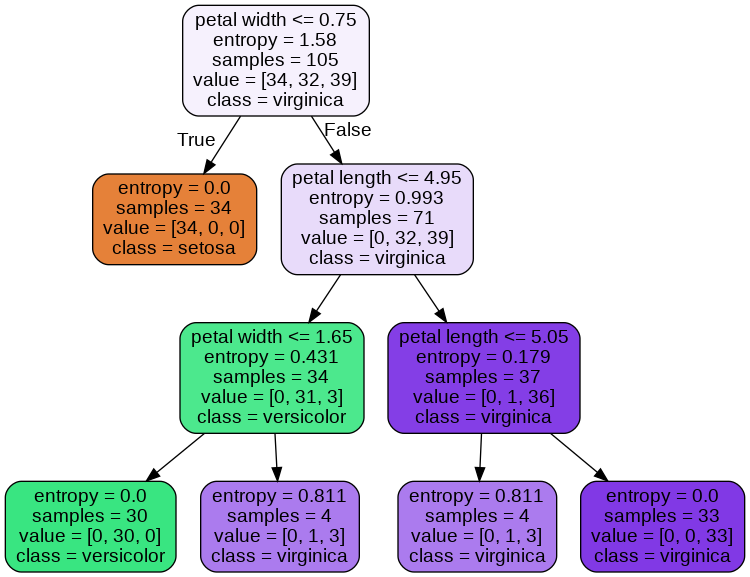

In [132]:
from IPython.display import Image, display
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=['petal length', 'petal width'],  
                                class_names=['setosa', 'versicolor', 'virginica'])
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))
#for the plot you should have dot and graphviz installed.